In [5]:
# Importation des librairies nécessaires 
import pandas as pd # Analyse, nettoyage et préparation des données
import numpy as np # Manipulation des matrices ou tableaux 
import seaborn as sns # Création de tracées statistiques
from matplotlib import pyplot as plt # Manipulation des données sous formes de graphiques
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
# Importation dataset
file_path = '/content/drive/My Drive/TP_FOUILLE_DONNEE/adult1.csv'
fichier = pd.read_csv(file_path,
                  names=["age", "workclass", "fnlwgt", "education","education-num", "marital-status", 
                         "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
                         "hours-per-week", "native-country","classification"])
dataset = fichier.rename(columns={'education-num': 'education_num','marital-status': 'marital_status',
                                  'capital-gain': 'capital_gain', 'capital-loss': 'capital_loss',
                                  'hours-per-week': 'hours_per_week', 'native-country': 'native_country'})
dataset

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,classification
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
# Taille dataset
dataset.shape
# liste des colonnes
dataset.columns
# 5 premieres lignes
dataset.head()
# 5 dernieres lignes
dataset.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,classification
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [10]:
dataset.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
dataset.describe(percentiles=None, include=None, exclude=np.object)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
classification    object
dtype: object

In [13]:
dataset['sex'] == "Female"


0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: sex, Length: 32561, dtype: bool

In [14]:
dataset['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

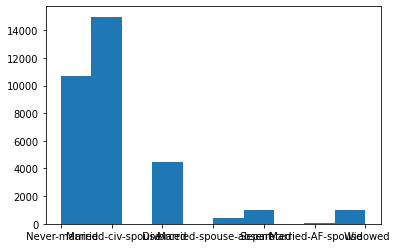

In [15]:
x = dataset['marital_status']
plt.hist(x)
plt.show()

In [16]:
dataset['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

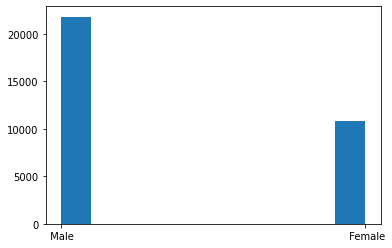

In [17]:
x = dataset['sex']
plt.hist(x)
plt.show()

## Description unidimentionnelle

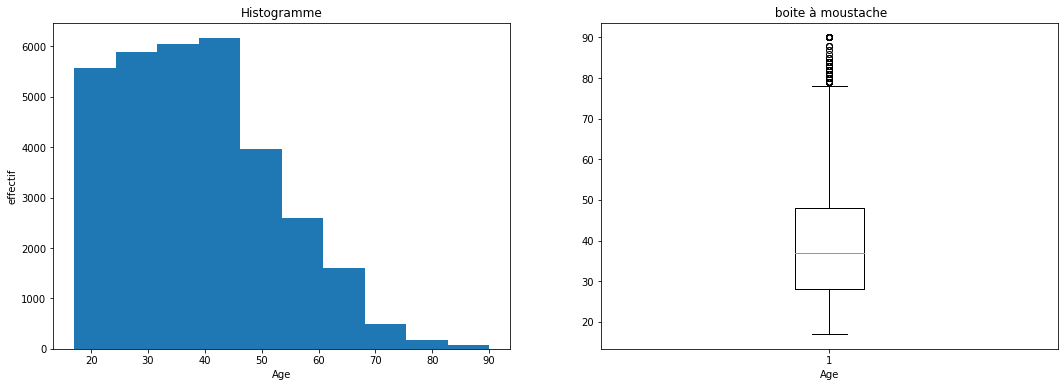

In [18]:
# Variables quantitatives
# Histogramme et diagramme de boite
# subplot(121) nbre de lignes, nbre de colonnes, numéro de la figure
nouvelle_figure = plt.figure(figsize=(18,6))
axe1 = plt.subplot(121)
axe2 = plt.subplot(122)
axe1.hist(fichier['age']) #,bins=10
axe2.boxplot(fichier["age"])

axe1.set_title('Histogramme')
axe2.set_title(' boite à moustache')
axe1.set_xlabel('Age')
axe1.set_ylabel('effectif')
axe2.set_xlabel('Age')
plt.grid(False)
# Enregistrer l'image
#plt.savefig('age')
plt.show()

In [19]:
dataset.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [20]:
type(dataset.corr())

pandas.core.frame.DataFrame

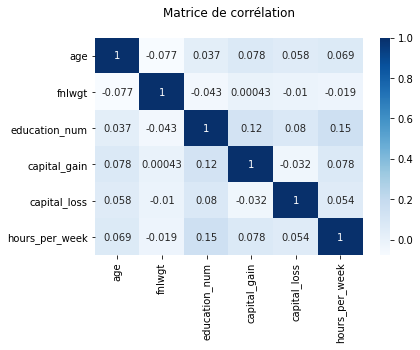

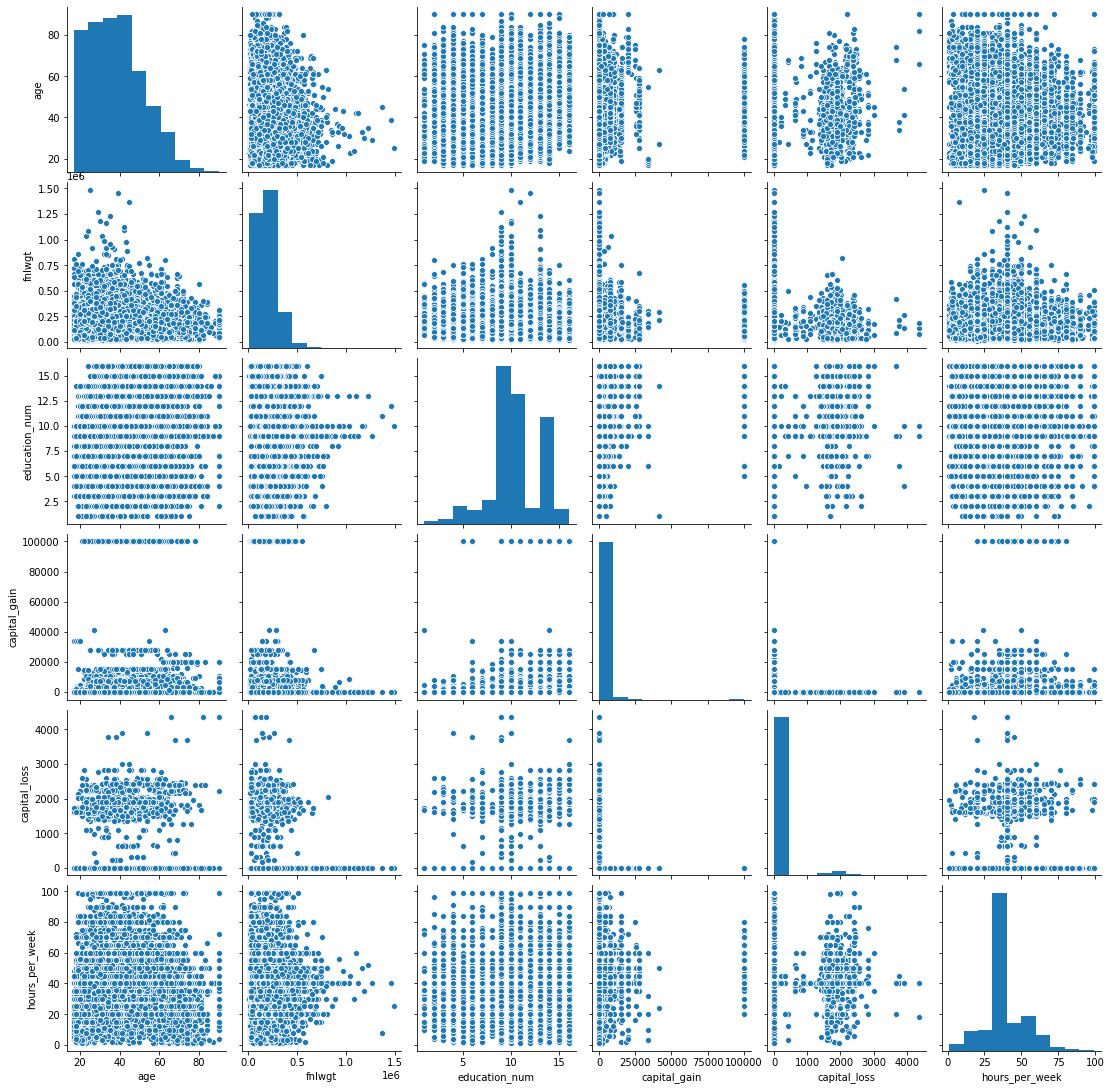

In [21]:
sns.heatmap(dataset.corr(), annot=True , cmap = 'Blues')
plt.title("Matrice de corrélation\n")
# Correlation paire de points
sns_plot = sns.pairplot(dataset, palette="pal")

## Analyse des composantes principales

In [22]:
features = [ 'age', 'fnlwgt', 'education_num','capital_gain','hours_per_week']
# Séparation des caractéristiques
x = dataset.loc[:, features].values
# Séparation par rapport à l'objectif
y = dataset.loc[:,['classification']].values
# Standardisation des caractéristiques
x = StandardScaler().fit_transform(x)
x

array([[ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -0.14592048, -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.14592048, -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -1.65522476],
       [ 0.98373415,  0.92989258, -0.42005962,  1.88842434, -0.03542945]])

## Calcul de la moyenne et de l'écart type après normalisation

In [23]:
#Moyenne
np.mean(x,axis=0)
# Ecart-type
np.std(x,axis=0,ddof=0)

array([1., 1., 1., 1., 1.])

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

In [25]:
pca.explained_variance_ratio_

array([0.25759858, 0.20644511, 0.18997436, 0.18154975])

In [26]:
#Calcul du pourcentage de perte
print(sum(pca.explained_variance_ratio_)*100)

83.55677996752965


## Analyse factorielle

In [27]:
#Vérifier l'existence des variables manquantes
adults_cp = dataset
adults_cp[adults_cp.isnull().any(axis=1)].count()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
classification    0
dtype: int64

In [28]:
#Vérifier l'existence des doublons
dfObj = pd.DataFrame(adults_cp)
dfObj.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [29]:
adults_cp

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,classification
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [30]:
# Reduction du nombre de column de la variable native_country
adults_cp.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [31]:
data_test = adults_cp.iloc[1,13]
data_test

' United-States'

In [32]:
taille_dataset = adults_cp.shape[0]
for i in range(taille_dataset):
  if adults_cp.iloc[i,13] == ' United-States':
    adults_cp.at[i,'native_country'] = 1 
  else:
    adults_cp.at[i,'native_country'] = 0

In [33]:
adults_cp.native_country.value_counts()

1    29170
0     3391
Name: native_country, dtype: int64

In [34]:
adults_cp.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [35]:
#Ajout des occupations Protective-serv, Priv-house-serv Armed-Forces sur la nouvelle variable Other
adults_cp['occupation'] = adults_cp.occupation.str.replace('Priv-house-serv', 'Other').str.replace('Armed-Forces', 'Other').str.replace('Protective-serv', 'Other')
adults_cp.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Other                 807
Name: occupation, dtype: int64

In [36]:
adults_cp.race.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [37]:
#Ajout des amérindiens sur Other
adults_cp['race'] = adults_cp.race.str.replace('Other', 'Other').str.replace('Amer-Indian-Eskimo', 'Other')
adults_cp.race.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Other                   582
Name: race, dtype: int64

In [38]:
adults_cp.marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [39]:
#Ajout des statuts Married-spouse-absent Married-AF-spouse sur Other
adults_cp['marital_status'] = adults_cp.marital_status.str.replace('Married-spouse-absent', 'Other').str.replace('Married-AF-spouse', 'Other')
adults_cp.marital_status.value_counts()

 Married-civ-spouse    14976
 Never-married         10683
 Divorced               4443
 Separated              1025
 Widowed                 993
 Other                   441
Name: marital_status, dtype: int64

In [40]:
adults_cp.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [41]:
#Ajout des workclass Without-pay Never-worked sur Self-emp-inc
adults_cp['workclass'] = adults_cp.workclass.str.replace('Self-emp-inc', 'Self-emp-inc').str.replace('Without-pay', 'Self-emp-inc').str.replace('Never-worked', 'Self-emp-inc')
adults_cp.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1137
 Federal-gov           960
Name: workclass, dtype: int64

In [42]:
adults_cp.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [43]:
#Ajout des sex Female = 0  et Male = 1
adults_cp['sex'] = adults_cp.sex.str.replace('Female', '0').str.replace('Male', '1')
adults_cp.sex.value_counts()

 1    21790
 0    10771
Name: sex, dtype: int64

In [44]:
adults_cp.education_num.value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [45]:
#Suppression de la colonne education_num car elle ne donne pas d'information
adults_cp.drop('education_num', axis=1,inplace = True)
adults_cp.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,classification
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0,<=50K


In [46]:
adults_cp['classification'] = adults_cp.classification.str.replace('<=50K', '0').str.replace('>50K', '1')
adults_cp.classification.value_counts()
adults_with_class = adults_cp
adults_with_class.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
classification    object
dtype: object

In [47]:
#Suppression de la colonne classification car c'est elle qui contient les 
#adults_cp.drop('classification', axis=1,inplace = True)
adults_cp.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,classification
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0,0


In [48]:
#Dummy
adults_with_dummies = pd.get_dummies(data=adults_cp, columns = [ 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'], 
                                     prefix = ['workclass','education', 'marital_status', 'occupation', 'relationship', 'race','sex', 'native_country'])
print(adults_with_dummies.shape)
adults_with_dummies.head()

(32561, 62)


,age,fnlwgt,capital_gain,capital_loss,hours_per_week,classification,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-civ-spouse,marital_status_ Never-married,marital_status_ Other,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other,occupation_ Other-service,occupation_ Prof-specialty,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ 0,sex_ 1,native_country_0,native_country_1
0,39,77516,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
1,50,83311,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
2,38,215646,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
3,53,234721,0,0,40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
4,28,338409,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0


## Matrix de correlation pour identifier si nos nouvels variables sont correlées

In [49]:
# The Correltion matrix
corr = adults_with_dummies.corr()
corr

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-civ-spouse,marital_status_ Never-married,marital_status_ Other,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other,occupation_ Other-service,occupation_ Prof-specialty,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ 0,sex_ 1,native_country_0,native_country_1
age,1.000000,-0.076646,0.077674,0.057775,0.068756,0.042627,0.051227,0.060901,-0.198388,0.101808,0.136252,0.012763,-0.014504,-0.088314,-0.056016,0.039921,0.032076,0.102886,0.023014,-0.016196,-0.000434,0.010516,0.075787,0.019870,0.094761,0.012146,0.060651,-0.111262,0.129975,0.315679,-0.534359,0.013528,0.010210,0.265177,0.041323,-0.042902,0.012515,0.099352,0.034210,-0.098579,-0.016257,0.009191,-0.089346,0.054170,-0.031980,-0.019576,0.026909,0.316875,-0.010106,-0.070002,-0.432918,0.043188,0.020854,-0.011111,-0.019434,-0.031039,0.033412,-0.088832,0.088832,-0.015917,0.015917
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768,-0.002923,-0.007525,-0.002828,0.042907,-0.024348,-0.039058,-0.010891,0.011479,0.009440,0.010250,0.033791,0.041094,-0.002290,0.015246,0.006358,-0.015643,-0.007240,-0.003307,-0.001566,-0.022229,0.017303,-0.005231,-0.005269,-0.014973,-0.026363,0.037108,0.003446,0.028467,-0.026246,-0.002598,0.007765,0.008465,-0.019198,-0.032932,0.029015,0.012762,0.018485,-0.003719,-0.016206,0.003728,0.003765,0.001265,-0.021140,0.007503,0.025518,0.013818,0.004400,-0.016897,-0.051323,0.118009,-0.042718,-0.056896,-0.026858,0.026858,0.075287,-0.075287
capital_gain,0.077674,0.000432,1.000000,-0.031615,0.078409,-0.015585,-0.005768,-0.007007,-0.038701,0.095660,0.031847,-0.010373,-0.015653,-0.022598,-0.012474,-0.009281,-0.012410,-0.016254,-0.012614,-0.010898,-0.010337,0.040769,0.056671,-0.046791,0.047527,-0.000961,0.169658,-0.034826,-0.018798,0.085873,-0.066334,-0.006905,-0.013233,-0.012166,-0.015693,-0.028502,-0.022000,0.060618,-0.011724,-0.023272,-0.025957,-0.009854,-0.040271,0.085222,0.011652,-0.009372,-0.018061,0.080175,-0.026489,-0.019046,-0.053601,-0.029004,0.017730,0.009851,-0.020631,-0.005632,0.014429,-0.048480,0.048480,-0.004599,0.004599
capital_loss,0.057775,-0.010252,-0.031615,1.000000,0.054256,-0.016102,0.010798,0.014668,-0.027460,0.030669,0.021175,-0.002047,-0.012982,-0.017874,-0.015836,-0.006966,-0.004806,-0.007639,-0.018325,0.002793,-0.007602,0.034183,0.049377,-0.028829,0.046586,-0.002046,0.047923,-0.020884,-0.022396,0.080466,-0.060623,-0.009461,-0.013061,-0.003361,-0.016275,-0.023806,0.001094,0.048311,-0.010670,-0.021672,-0.016259,-0.007124,-0.040847,0.046255,0.009697,0.004830,-0.003282,0.075491,-0.017299,-0.015734,-0.050922,-0.039136,0.017138,0.004469,-0.021762,-0.013594,0.021044,-0.045567,0.045567,-0.008784,0.008784
hours_per_week,0.068756,-0.018768,0.078409,0.054256,1.000000,-0.168640,0.013293,0.011576,-0.020928,0.124121,0.093884,-0.023200,-0.047085,-0.102038,-0.043785,-0.012724,-0.012675,-0.012336,-0.024542,0.000995,0.020005,0.078207,0.059998,0.007707,0.065068,-0.012159,0.075948,-0.068960,0.026052,0.212817,-0.197936,-0.006562,-0.016587,-0.107122,-0.169244,-0.084378,0.057375,0.139208,0.094

In [50]:
adults_with_dummies.shape

(32561, 62)

In [51]:
#data_drop_class = adults_with_dummies.drop(['classification'],axis=1)
#data_drop_class.shape

In [52]:
from itertools import chain
#correlation_threshold = 2/(np.sqrt(adults_with_dummies.shape[0])) # can be switched. Default value 0.99
correlation_threshold = 0.2
cor = adults_with_dummies.corr()
cor.loc[:,:] =  np.tril(cor, k=-1)
cor = cor.stack()
print(type(cor))
correlated = cor[cor > correlation_threshold].reset_index().loc[:,['level_0','level_1']]
correlated = correlated.query('level_0 not in level_1')
print(type(correlated))
print(correlated)
print(correlated.head())
correlated_array =  correlated.groupby('level_0').agg(lambda x: set(chain(x, x))).values
#df['D'] = (df.apply(lambda x: myfunc(x[colNames[0]], x[colNames[1]]), axis=1))
print(correlated.shape)
correlated_array

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
                        level_0                             level_1
2       marital_status_ Widowed                                 age
3                 occupation_ ?                        workclass_ ?
4   occupation_ Farming-fishing         workclass_ Self-emp-not-inc
5             occupation_ Other                workclass_ Local-gov
6    occupation_ Prof-specialty                education_ Bachelors
7    occupation_ Prof-specialty                education_ Doctorate
8    occupation_ Prof-specialty                  education_ Masters
9    occupation_ Prof-specialty              education_ Prof-school
13  relationship_ Not-in-family            marital_status_ Divorced
14  relationship_ Not-in-family       marital_status_ Never-married
15      relationship_ Own-child       marital_status_ Never-married
18                       sex_ 0            marital_status_ Divorced
19                       sex_ 0           

array([[{'age'}],
       [{'race_ Asian-Pac-Islander', 'education_ 5th-6th'}],
       [{'race_ White'}],
       [{'workclass_ ?'}],
       [{'workclass_ Self-emp-not-inc'}],
       [{'workclass_ Local-gov'}],
       [{'education_ Prof-school', 'education_ Doctorate', 'education_ Masters', 'education_ Bachelors'}],
       [{'marital_status_ Divorced', 'marital_status_ Never-married'}],
       [{'marital_status_ Never-married'}],
       [{'relationship_ Wife', 'occupation_ Adm-clerical', 'relationship_ Unmarried', 'marital_status_ Divorced'}],
       [{'hours_per_week', 'relationship_ Husband', 'marital_status_ Married-civ-spouse', 'occupation_ Craft-repair'}]],
      dtype=object)

In [53]:
correlated_features = []
for sets in correlated_array:
    element_list = list(sets[0])
    #print(element_list)
    for idx, el in enumerate(element_list):
        if idx is not 0:
            correlated_features.append(el)
#correlated_features.sort(key = lambda x: int(x[1:]) )
print(len(correlated_features))
print(correlated_features)
correlated_features = list(set(correlated_features))
print(len(correlated_features))
print(correlated_features)

11
['education_ 5th-6th', 'education_ Doctorate', 'education_ Masters', 'education_ Bachelors', 'marital_status_ Never-married', 'occupation_ Adm-clerical', 'relationship_ Unmarried', 'marital_status_ Divorced', 'relationship_ Husband', 'marital_status_ Married-civ-spouse', 'occupation_ Craft-repair']
11
['marital_status_ Divorced', 'education_ 5th-6th', 'occupation_ Adm-clerical', 'relationship_ Husband', 'occupation_ Craft-repair', 'relationship_ Unmarried', 'education_ Doctorate', 'education_ Masters', 'marital_status_ Married-civ-spouse', 'marital_status_ Never-married', 'education_ Bachelors']


In [78]:
non_cor_train_df = adults_with_dummies.drop(correlated_features, axis=1 )
non_cor_train_df.shape

(32561, 51)

In [58]:
data_drop_class = non_cor_train_df.drop(['classification'],axis=1)
data_drop_class.shape

(32561, 50)

In [59]:
# Heatmap
'''import matplotlib.pyplot as plt
plt.figure(figsize = (18,18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(new_corr, xticklabels=new_corr.columns.values, yticklabels=new_corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
#plt.savefig("corr")
file_path1 = '/content/drive/My Drive/TP_FOUILLE_DONNEE/tt.png'
plt.savefig(file_path1, bbox_inches='tight', pad_inches=0.0)

plt.title('Heatmap of Correlation Matrix')'''

'import matplotlib.pyplot as plt\nplt.figure(figsize = (18,18))\ncmap = sns.diverging_palette(220, 10, as_cmap=True)\nsns.heatmap(new_corr, xticklabels=new_corr.columns.values, yticklabels=new_corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})\n#plt.savefig("corr")\nfile_path1 = \'/content/drive/My Drive/TP_FOUILLE_DONNEE/tt.png\'\nplt.savefig(file_path1, bbox_inches=\'tight\', pad_inches=0.0)\n\nplt.title(\'Heatmap of Correlation Matrix\')'

**K-means Clustering**

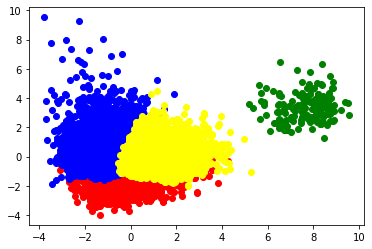

In [60]:
# Fit K-means with Scikit
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(principalComponents)

# Predict the cluster for all the samples
P = kmeans.predict(principalComponents)
plt.scatter(principalComponents[P==0, 0], principalComponents[P==0, 1], c='red', label ='Cluster 1')
plt.scatter(principalComponents[P==1, 0], principalComponents[P==1, 1], c='blue', label ='Cluster 2')
plt.scatter(principalComponents[P==2, 0], principalComponents[P==2, 1], c='green', label ='Cluster 3')
plt.scatter(principalComponents[P==3, 0], principalComponents[P==3, 1], c='yellow', label ='Cluster 4')
plt.show()

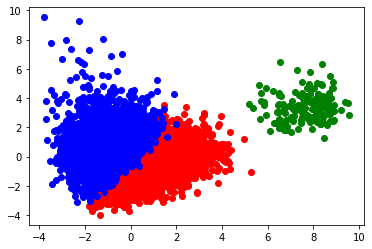

In [61]:
# Fit K-means with Scikit
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(principalComponents)

# Predict the cluster for all the samples
P = kmeans.predict(principalComponents)
plt.scatter(principalComponents[P==0, 0], principalComponents[P==0, 1], c='red', label ='Cluster 1')
plt.scatter(principalComponents[P==1, 0], principalComponents[P==1, 1], c='blue', label ='Cluster 2')
plt.scatter(principalComponents[P==2, 0], principalComponents[P==2, 1], c='green', label ='Cluster 3')
plt.show()

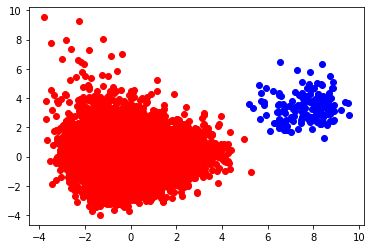

In [62]:
# Fit K-means with Scikit
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(principalComponents)

# Predict the cluster for all the samples
P = kmeans.predict(principalComponents)
plt.scatter(principalComponents[P==0, 0], principalComponents[P==0, 1], c='red', label ='Cluster 1')
plt.scatter(principalComponents[P==1, 0], principalComponents[P==1, 1], c='blue', label ='Cluster 2')
plt.show()

** Methode HAC**

In [63]:
principalComponents.shape

(32561, 4)

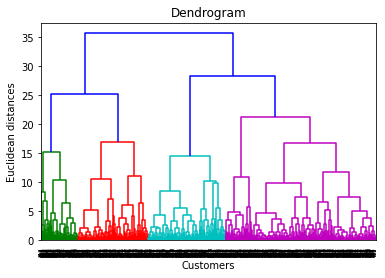

In [64]:
import scipy.cluster.hierarchy as sch
x = principalComponents[:1000, :]
x.shape
dendrogram = sch.dendrogram(sch.linkage(x, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [65]:
#adults_with_dummies_class = 

non_cor_train_df

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,classification,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ HS-grad,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Other,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other,occupation_ Other-service,occupation_ Prof-specialty,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ 0,sex_ 1,native_country_0,native_country_1
0,39,77516,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1
1,50,83311,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,38,215646,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1
3,53,234721,0,0,40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,28,338409,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,0,0,38,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1
32557,40,154374,0,0,40,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
32558,58,151910,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
32559,22,201490,0,0,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1


In [66]:
'''adults_with_dummies_class = pd.get_dummies(data=adults_with_class, columns = [ 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'], 
                                     prefix = ['workclass','education', 'marital_status', 'occupation', 'relationship', 'race','sex', 'native_country'])
print(adults_with_dummies_class.shape)
adults_with_dummies_class.head()'''

"adults_with_dummies_class = pd.get_dummies(data=adults_with_class, columns = [ 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'], \n                                     prefix = ['workclass','education', 'marital_status', 'occupation', 'relationship', 'race','sex', 'native_country'])\nprint(adults_with_dummies_class.shape)\nadults_with_dummies_class.head()"

In [67]:
#data_drop_class = non_cor_train_df.drop(['classification'],axis=1)
x= non_cor_train_df.drop(['classification'],axis=1)
y=non_cor_train_df['classification']

In [68]:
from sklearn.model_selection import train_test_split
split_size=0.3

#Creation of Train and Test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=5)

In [69]:
print ("Train dataset: {0}{1}".format(x_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(x_val.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(x_test.shape, y_test.shape))

Train dataset: (18233, 50)(18233,)
Validation dataset: (4559, 50)(4559,)
Test dataset: (9769, 50)(9769,)


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
models = []
names = ['Random Forest','DecisionTreeClassifier','SVM',]

models.append((RandomForestClassifier(n_estimators=100)))
models.append((DecisionTreeClassifier()))
models.append((SVC()))
print (models)

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), SVC(C=1.0, break_ties=F

In [71]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score
kfold = model_selection.KFold(n_splits=5,random_state=7)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],x_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(x_train,y_train)
    prediction = models[i].predict(x_val)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


----------------------------------------
Random Forest: 0.8556701030927835
----------------------------------------
DecisionTreeClassifier: 0.8085106382978723
----------------------------------------
SVM: 0.7905242377714411


In [72]:
#Random Forest
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(x_train,y_train)
prediction = randomForest.predict(x_test)
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))

----------------------------------------
Accuracy score:
0.8473743474255298
----------------------------------------
Confusion Matrix:
[[6834  524]
 [ 967 1444]]


In [73]:
#DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(random_state = 100)
clf_gini.fit(x_train, y_train)
y_pred = clf_gini.predict(x_test)
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,y_pred))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,y_pred))

----------------------------------------
Accuracy score:
0.7999795270754427
----------------------------------------
Confusion Matrix:
[[6331 1027]
 [ 927 1484]]


In [74]:
#SVM
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(x_train,y_train)
y_pred_svm=svc.predict(x_test)
print ('-'*40)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred_svm))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,y_pred_svm))

----------------------------------------
Accuracy Score:
0.7842153751663425
----------------------------------------
Confusion Matrix:
[[7356    2]
 [2106  305]]


**Features importances**

In [75]:
import pandas
fi = pd.DataFrame({'feature': x_train.columns, 'importance': randomForest.feature_importances_}).sort_values(by='importance', ascending=False)
fi = fi.reset_index()
pandas.set_option('display.max_rows',fi.shape[0]+1)
print(fi)

    index                        feature  importance
0       0                            age    0.179496
1       1                         fnlwgt    0.174309
2       2                   capital_gain    0.114753
3       4                 hours_per_week    0.092967
4       3                   capital_loss    0.041508
5      38    relationship_ Not-in-family    0.034940
6      28    occupation_ Exec-managerial    0.028904
7      34     occupation_ Prof-specialty    0.025298
8      40        relationship_ Own-child    0.024474
9      41             relationship_ Wife    0.024158
10     46                         sex_ 0    0.021900
11     20             education_ HS-grad    0.020030
12     47                         sex_ 1    0.017027
13     23        education_ Some-college    0.015418
14      8             workclass_ Private    0.011496
15     33      occupation_ Other-service    0.010187
16     10    workclass_ Self-emp-not-inc    0.009730
17     35              occupation_ Sales    0.

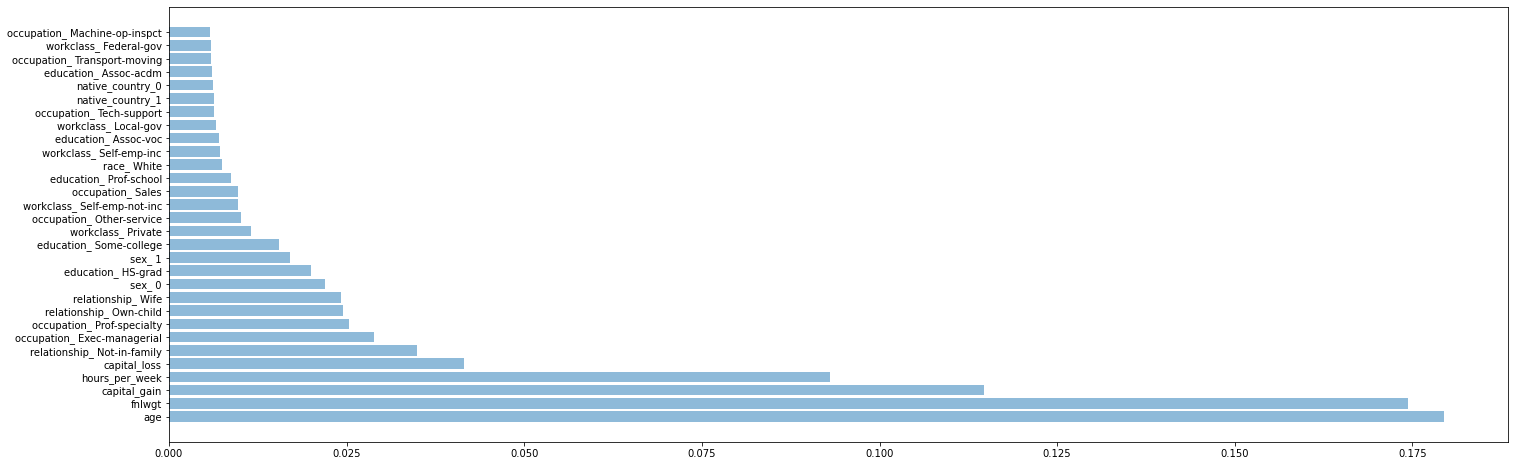

In [76]:
def plot_feature_importance(fi):
    fig, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=(24,8))
    num_bar = min(len(fi.index), 30)
    ax2.barh(np.arange(0, num_bar), fi['importance'][:num_bar], align='center', alpha=0.5)
    ax2.set_yticks(np.arange(0, num_bar))
    ax2.set_yticklabels(fi['feature'][:num_bar])
plot_feature_importance(fi)

**Cross validation**

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
y_i = non_cor_train_df[['classification']]
x_i = non_cor_train_df.drop('classification', 1)

dt_i = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(dt_i, x_i, y_i.values.ravel(), cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))
print("Cross-validation scores mean:\n{}".format(scores.mean()))

Cross-validation scores:
[0.85209754 0.850562   0.85332596 0.85086911 0.85492292]
Cross-validation scores mean:
0.8523555064185245
